In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt_tab')
import seaborn as sns
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from wordcloud import WordCloud
wc=WordCloud()
from collections import Counter
#1.data cleaning
#2.EDA
#3.Text Preprocessing
#4.Model building
#5.Evaluation
#6.Improvement
#7.Website
#8.Deploy

[nltk_data] Downloading package punkt_tab to /home/kali/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df['transformed_text']=df['text'].apply(transform_text)
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    a=[]
    for i in text:
        if i.isalnum():
            a.append(i)
    text=a[:]
    a.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            a.append(i)
    text=a[:]
    a.clear()
    for i in text:
        a.append(ps.stem(i))
    return " ".join(a)
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
spam_counter=pd.DataFrame(Counter(spam_corpus).most_common(30))

In [20]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
#have to remove duplicates
df=df.drop_duplicates(keep='first')
df['target']=encoder.fit_transform(df['target'])
#num of chars
df['num_char']=df['text'].apply(len)
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
#num of sentences
df['num_sents']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [3]:
df.sample(5)

,target,text,num_char,num_words
1077,0,"Yep, by the pretty sculpture",28,6
1424,0,Yes.. now only saw your message..,33,8
69,0,I plane to give on this month end.,34,9
770,0,Not getting anywhere with this damn job huntin...,58,11
1172,0,Happy new years melody!,23,5


In [9]:
df.shape

(5572, 5)

### 1.Data Cleaning

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   target            5169 non-null   int64 
 1   text              5169 non-null   object
 2   num_char          5169 non-null   int64 
 3   num_words         5169 non-null   int64 
 4   transformed_text  5169 non-null   object
dtypes: int64(3), object(2)
memory usage: 371.3+ KB


In [22]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

KeyError: "['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] not found in axis"

In [23]:
df.head()

,target,text,num_char,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [18]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [19]:
df.sample(7)

,target,text
525,ham,Hi i won't b ard 4 christmas. But do enjoy n m...
3414,ham,He remains a bro amongst bros
2192,ham,Congrats ! Treat pending.i am not on mail for ...
4522,ham,Actually I decided I was too hungry so I haven...
1156,ham,Hey.. Something came up last min.. Think i wun...
4460,ham,Thanks again for your reply today. When is ur ...
4868,ham,1. Tension face 2. Smiling face 3. Waste face ...


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
df['target']=encoder.fit_transform(df['target'])

In [51]:
df.head(5)
df.isnull().sum()

target              0
text                0
num_char            0
num_words           0
transformed_text    0
dtype: int64

In [52]:
df.duplicated().sum()

0

In [53]:
#have to remove duplicates
df=df.drop_duplicates(keep='first')

In [54]:
df.shape

(5169, 5)

### 2.EDA

In [55]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

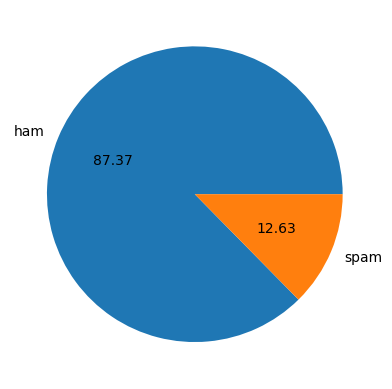

In [56]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [57]:
#data is imbalnced

In [58]:
import nltk

In [59]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/kali/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
df['num_char']=df['text'].apply(len)

In [9]:
df

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [ ]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [63]:
df

,target,text,num_char,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah think goe usf live around though
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,guy bitch act like interest buy someth els nex...


In [64]:
#num of sentences
df['num_sents']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [17]:
df[['num_char','num_words','num_sents']].describe()

,num_char,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [67]:
#ham
df[df['target']==0][['num_char','num_words','num_sents']].describe()

,num_char,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [68]:
#spam
df[df['target']==1][['num_char','num_words','num_sents']].describe()

,num_char,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [20]:
import seaborn as sns

<AxesSubplot: xlabel='num_char', ylabel='Count'>

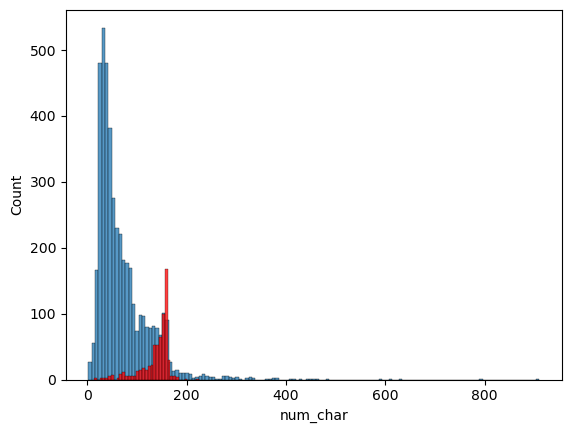

In [22]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

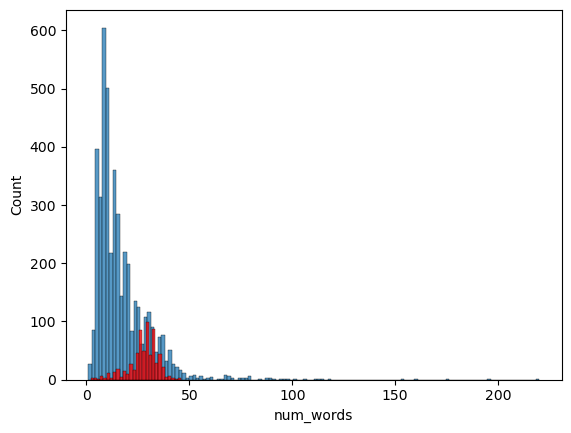

In [23]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

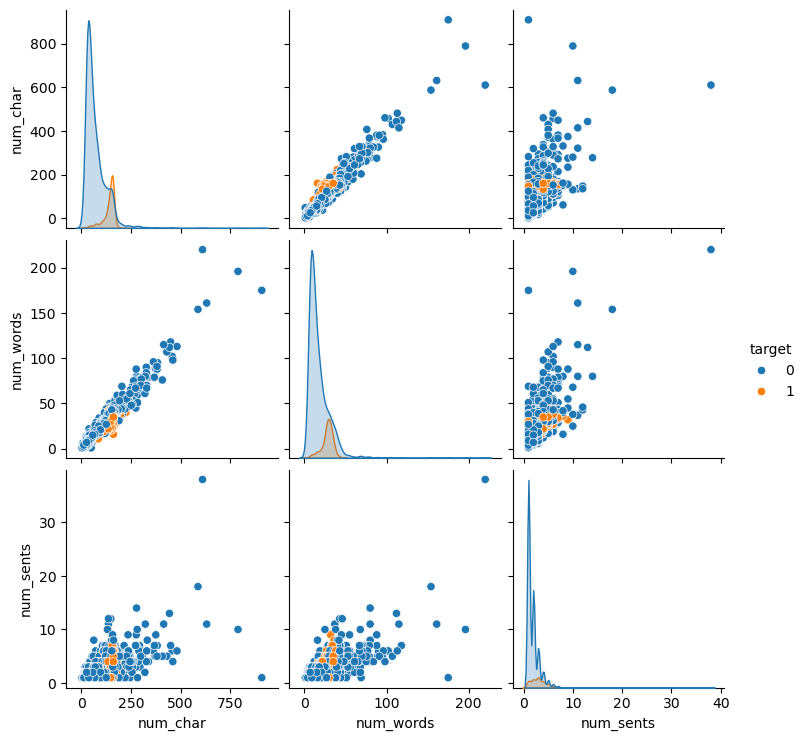

In [24]:
sns.pairplot(df,hue='target')

/tmp/ipykernel_7680/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

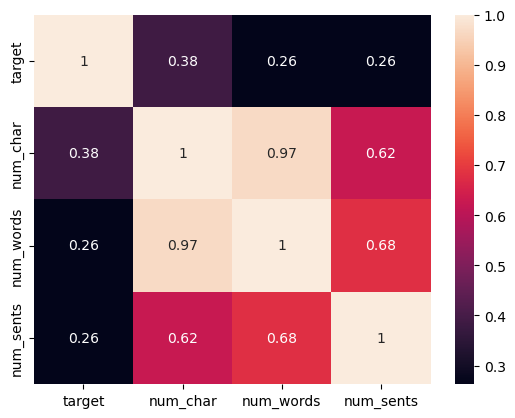

In [25]:
sns.heatmap(df.corr(),annot=True)

### 3.Data Preprocessing 
  - Lower case
  - Tokenization
  - Removing special characters
  - Removing stop words and punctuation
  - Stemming

In [17]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    a=[]
    for i in text:
        if i.isalnum():
            a.append(i)
    text=a[:]
    a.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            a.append(i)
    text=a[:]
    a.clear()
    for i in text:
        a.append(ps.stem(i))
    return " ".join(a)

In [18]:
transform_text("HI I AM MONU and i like dancing and singing @217")

'hi monu like danc sing 217'

In [11]:
print(transform_text(df['text'][1]))

ok lar joke wif u oni


In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /home/kali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [10]:

ps.stem('dance')

'danc'

In [16]:
df['transformed_text']=df['text'].apply(transform_text)

In [18]:
from wordcloud import WordCloud
wc=WordCloud() 
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" ")) 

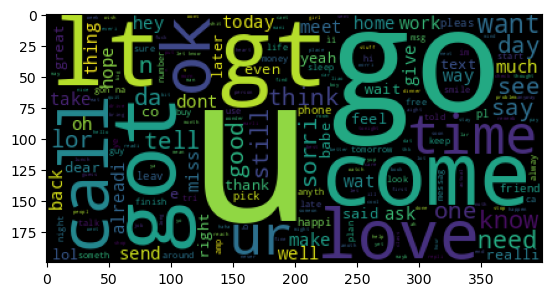

In [111]:
plt.imshow(ham_wc)

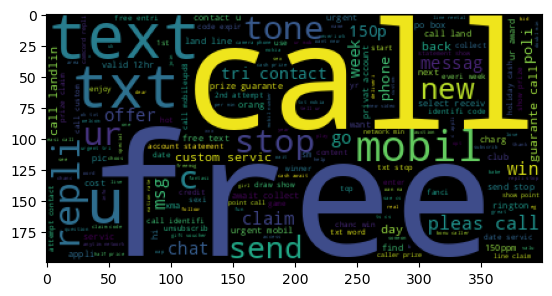

In [19]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [20]:
df

,target,text,num_char,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah think goe usf live around though
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,guy bitch act like interest buy someth els nex...


In [14]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [74]:
len(spam_corpus)

9939

In [16]:
from collections import Counter
spam_counter=pd.DataFrame(Counter(spam_corpus).most_common(30))

In [17]:
spam_counter

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [18]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [19]:
ham_counter=pd.DataFrame(Counter(ham_corpus).most_common(30))

In [20]:
ham_counter

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


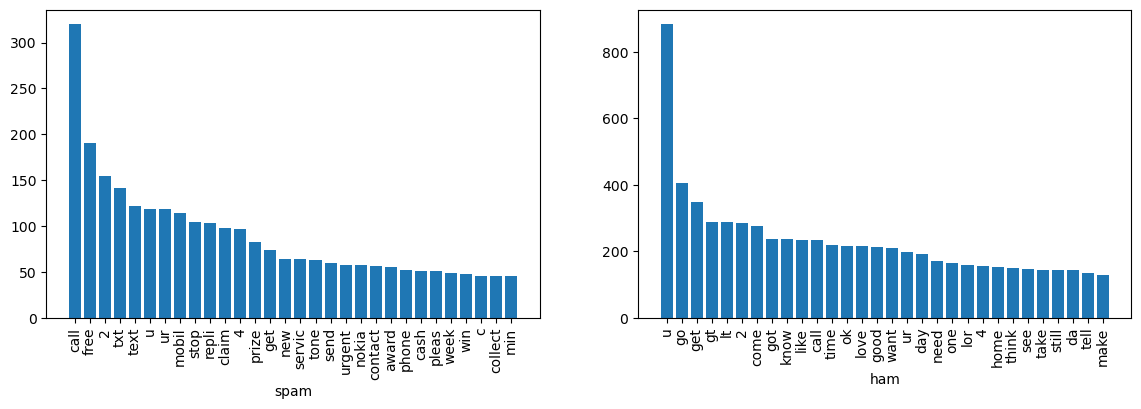

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.bar(spam_counter[0],spam_counter[1])
plt.xticks(rotation=90)
plt.xlabel("spam")
plt.subplot(1,2,2)
plt.bar(ham_counter[0],ham_counter[1])
plt.xticks(rotation=90)
plt.xlabel("ham")
plt.show()

### 4.Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [60]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
X.shape

(5169, 3000)

In [62]:
y=df['target'].values

In [63]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [68]:
#GaussianNB
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred1))
print("Confusion matrix :")
print(confusion_matrix(y_test,y_pred1))
print("Precision score :",precision_score(y_test,y_pred1))


Accuracy :  0.8694390715667312
Confusion matrix :
[[788 108]
 [ 27 111]]
Precision score : 0.5068493150684932


In [69]:
#MulitnomialNB
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred2))
print("Confusion matrix :")
print(confusion_matrix(y_test,y_pred2))
print("Precision score :",precision_score(y_test,y_pred2))


Accuracy :  0.9709864603481625
Confusion matrix :
[[896   0]
 [ 30 108]]
Precision score : 1.0


In [70]:
#BinomialNB
bnb.fit(X_train,y_train)
y_pred3=gnb.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred3))
print("Confusion matrix :")
print(confusion_matrix(y_test,y_pred3))
print("Precision score :",precision_score(y_test,y_pred3))

Accuracy :  0.8694390715667312
Confusion matrix :
[[788 108]
 [ 27 111]]
Precision score : 0.5068493150684932


In [71]:
df

,target,text,num_char,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [72]:
#tfidf mnb


In [73]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
